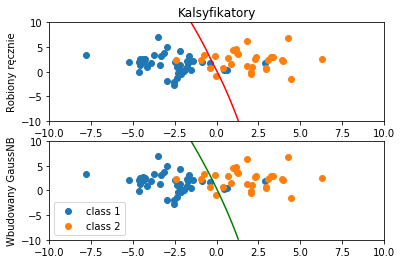

In [2]:
import matplotlib.pyplot as mpl
import numpy as num
import pandas as pan
import sklearn.naive_bayes as sc
import scipy.stats as ss
from itertools import product
import math as m

def gauss(x, mean, std):
	return (1.0/(m.sqrt(2 * m.pi) * std)) * m.exp(-((x-mean)**2 / (2 * std**2 )))

def expand_grid(data_dict):
    rows = product(*data_dict.values())
    return pan.DataFrame.from_records(rows, columns=data_dict.keys())

#Dane
m1 = num.array([-3,1])
m2 = num.array([2,2])
S = num.array([[4,0],[0,4]])
n1 = 40
n2 = 30

#klasy z rozkladu normalnego dla m1,m2 i S
X1 = num.random.multivariate_normal(m1,S,n1)
X2 = num.random.multivariate_normal(m2,S,n2)
X3 = num.concatenate((X1,X2))
Y = num.ones(n1+n2)
Y[n1:] = 2

#wrzut do data_frame
df1 = pan.DataFrame(X1)
df2 = pan.DataFrame(X2)

#sklejenie w 1 ramke
df3 = df1 + df2

#wrzut na wykres
#mpl.scatter(X1[:,0],X1[:,1], label = 'class 1')
#mpl.scatter(X2[:,0],X2[:,1], label = 'class 2')

#srednie
mean1 = num.sum(df1)/n1
mean2 = num.sum(df2)/n2

#wariancje
variance1 = num.std(df1, axis = 0)
variance2 = num.std(df2, axis = 0)

#apriori
ap1 = n1/(n1+n2)
ap2 = n2/(n1+n2)

#siatka dla klasyfikatora
size = 100
grid = expand_grid({'val_1': num.linspace(-10,10,size), 'val_2' : num.linspace(-10,10,size)})

grid_size = int(grid.size/2)
#print(grid_size)

#inicjalizacja
X1_pdf = num.zeros(grid_size)
X2_pdf = num.zeros(grid_size)
pom = num.ones(grid_size)

xGrid, yGrid = num.meshgrid(num.linspace(-10,10,size), num.linspace(-10,10,size))

#przygotowanie macierzy gestosci prawdopodobienstwa
for i in range(grid_size):
    X1_pdf[i] = ap1 * gauss(grid.iloc[i,0], mean1[0], variance1[0]) * gauss(grid.iloc[i,1], mean1[1], variance1[1])
    X2_pdf[i] = ap2 * gauss(grid.iloc[i,0], mean2[0], variance2[0]) * gauss(grid.iloc[i,1], mean2[1], variance2[1])

post = num.vstack(num.absolute((X1_pdf/(X1_pdf + X2_pdf), X2_pdf - X1_pdf/(X1_pdf + X2_pdf)))).T
post = post[:, 1].reshape(yGrid.shape)
#print(post)

#klasyfikacja funkcja ze scikit'a
gausNB = sc.GaussianNB()
gausNB.fit(X3,Y)
prob = gausNB.predict_proba(grid)
prob = prob[:,1].reshape(xGrid.shape)

#wykresy
mpl.subplot(2, 1, 1)
mpl.scatter(X1[:,0],X1[:,1], label = 'class 1')
mpl.scatter(X2[:,0],X2[:,1], label = 'class 2')
mpl.title('Kalsyfikatory')
mpl.contour(yGrid, xGrid, post, [0.5], colors='red')
mpl.ylabel('Robiony ręcznie')

mpl.subplot(2, 1, 2)
mpl.scatter(X1[:,0],X1[:,1], label = 'class 1')
mpl.scatter(X2[:,0],X2[:,1], label = 'class 2')
mpl.contour(yGrid, xGrid, prob, [0.5], colors='green')
mpl.ylabel('Wbudowany GaussNB')

mpl.legend()
mpl.show()